<a href="https://colab.research.google.com/github/Avishek2020/LSTM-For-Time-Series/blob/main/Time_Series_Forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [5]:
# preparing independent(F1,F2,F3) and dependent(Y target) features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3 # can be 4 or 5 any
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [22]:
dffeatures = pd.DataFrame(X, columns=['F1', 'F2','F3'])
dftarget   = pd.DataFrame(y, columns=['Y'])
dffeatures = pd.concat([dffeatures, dftarget], axis=1)
dffeatures.head(10)

,F1,F2,F3,Y
0,110,125,133,146
1,125,133,146,158
2,133,146,158,172
3,146,158,172,187
4,158,172,187,196
5,172,187,196,210


In [7]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [23]:
X.shape

(6, 3)

In [24]:
# reshape from [samples, timesteps or n_steps] into [samples, timesteps or n_steps, features] 3 Dim for model
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Building LSTM Model

In [25]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33543.8398
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 33208.9023
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 32948.0156
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 32748.2891
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 32592.5176
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 32465.4980
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 32357.1797
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 32260.8750
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 32172.1035
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 32087.8672
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 32006.1250
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 31925.3379
Epoch 13/300
1

Predicting For the next 10 data
 

```
     F1	 F2	 F3	 Y
0	110	125	133	146
1	125	133	146	158
2	133	146	158	172
3	146	158	172	187
4	158	172	187	196
5	172	187	196	210 
```



In [37]:
# prediction for next data
x_input = np.array([187, 196, 210])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0])

[222.58516]


In [39]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.58516]
1 day input [196.        210.        222.5851593]
1 day output [[233.32924]]
2 day input [210.         222.5851593  233.32923889]
2 day output [[247.09259]]
3 day input [222.58516 233.32924 247.09259]
3 day output [[260.01035]]
4 day input [233.32924 247.09259 260.01035]
4 day output [[272.78723]]
5 day input [247.09259 260.01035 272.78723]
5 day output [[287.5166]]
6 day input [260.01035 272.78723 287.5166 ]
6 day output [[302.08862]]
7 day input [272.78723 287.5166  302.08862]
7 day output [[317.35828]]
8 day input [287.5166  302.08862 317.35828]
8 day output [[334.15594]]
9 day input [302.08862 317.35828 334.15594]
9 day output [[351.4394]]
[222.58516, 233.32924, 247.09259, 260.01035, 272.78723, 287.5166, 302.08862, 317.35828, 334.15594, 351.4394]


In [45]:
print(f"timeseries_data- {timeseries_data}\n\nlst_output- {lst_output}")

timeseries_data- [110, 125, 133, 146, 158, 172, 187, 196, 210]

lst_output- [222.58516, 233.32924, 247.09259, 260.01035, 272.78723, 287.5166, 302.08862, 317.35828, 334.15594, 351.4394]


Visualizaing The Output

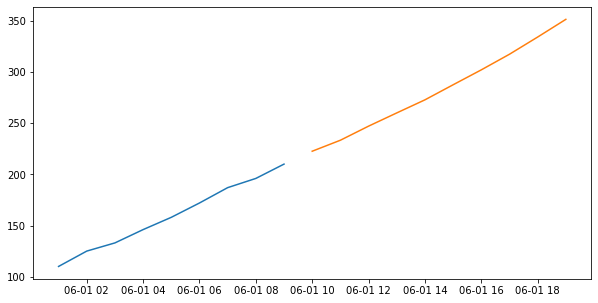

In [62]:
import matplotlib.pyplot as plt
import datetime

day_new=np.arange(1,10)
day_pred=np.arange(10,20)

base = datetime.datetime(2021, 6, 1)
day_new_dt = np.array([base + datetime.timedelta(hours=i) for i in range(1, 10)])
day_new_dt
day_pred_dt = np.array([base + datetime.timedelta(hours=i) for i in range(10, 20)])
day_pred_dt


plt.figure(figsize=(10,5))
plt.plot(day_new_dt, timeseries_data)
plt.plot(day_pred_dt, lst_output)